# Problem statement

The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the
>50K group or <=50K group.

Prediction task is to determine whether a person makes over 50K a year.

# Importing libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Getting data

In [4]:
df= pd.read_csv("C:/Users/Narashima Rao/Documents/Ineuron Dashboard Pro/machine-learning/adult_income_prediction/adult.csv")

In [5]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

# Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,

Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, 

Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, 

El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Data Exploration

In [7]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Shape of data
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32561 Columns: 15


In [10]:
df.shape

(32561, 15)

# Data cleaning

## Fixing '?' values in the dataset

In [11]:
df = df.replace('?', np.nan)

In [12]:
# null values in the data
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education-num     0.0 %
marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital-gain      0.0 %
capital-loss      0.0 %
hours-per-week    0.0 %
country           0.0 %
salary            0.0 %
dtype: object

There are no null values in the dataset

# Label Encoding

In [13]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

# Feature Selection

In [14]:
X = df.drop('salary', axis=1)
y = df['salary']

In [15]:
etc_selector = ExtraTreesClassifier(random_state=42)

In [16]:
etc_selector.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [17]:
feature_imp = etc_selector.feature_importances_

In [18]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.38
1 4.48
2 16.51
3 3.56
4 9.04
5 7.38
6 7.53
7 9.25
8 1.47
9 2.76
10 8.76
11 2.77
12 9.36
13 1.75


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  country         32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [20]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital-loss', 'country'], axis=1)

# Feature Scaling

In [21]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [88]:
print(X[col])

0       -0.035429
1       -2.222153
2       -0.035429
3       -0.035429
4       -0.035429
           ...   
32556   -0.197409
32557   -0.035429
32558   -0.035429
32559   -1.655225
32560   -0.035429
Name: hours-per-week, Length: 32561, dtype: float64


# Fixing imbalanced data using Oversampling technique

In [22]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: salary, dtype: object

In [23]:
over_sampler = RandomOverSampler(random_state=42)

In [24]:
over_sampler.fit(X,y)

RandomOverSampler(random_state=42)

In [25]:
X_over, y_over = over_sampler.fit_resample(X, y)

In [26]:
round(y_over.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: salary, dtype: object

# Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [30]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


# Models

1. Logistic Regression

2. Naive baye's

3. KNN

4. Decision tree classifier

5. Random forest classifier

6. Support Vector Classifier(SVC)

7. Xgboost classifier

In [42]:
log = LogisticRegression(random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
xgb = XGBClassifier()

In [40]:
def build_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    print(f"The accuracy of the model {type(model).__name__} is {accuracy :.2f}")
    print(confusion_matrix(y_test,y_pred))
    print(clf_report)
    print("\n")

## Logistic Regression

In [41]:
build_model(log,X_train,y_train,X_test,y_test)

The accuracy of the model LogisticRegression is 0.76
[[3705 1233]
 [1126 3824]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4938
           1       0.76      0.77      0.76      4950

    accuracy                           0.76      9888
   macro avg       0.76      0.76      0.76      9888
weighted avg       0.76      0.76      0.76      9888





## Naive baye's

In [43]:
build_model(nb,X_train,y_train,X_test,y_test)

The accuracy of the model GaussianNB is 0.66
[[4756  182]
 [3194 1756]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      4938
           1       0.91      0.35      0.51      4950

    accuracy                           0.66      9888
   macro avg       0.75      0.66      0.62      9888
weighted avg       0.75      0.66      0.62      9888





## KNN

In [44]:
build_model(knn,X_train,y_train,X_test,y_test)

The accuracy of the model KNeighborsClassifier is 0.83
[[3760 1178]
 [ 457 4493]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      4938
           1       0.79      0.91      0.85      4950

    accuracy                           0.83      9888
   macro avg       0.84      0.83      0.83      9888
weighted avg       0.84      0.83      0.83      9888





## Decision tree classifier

In [45]:
build_model(dtc,X_train,y_train,X_test,y_test)

The accuracy of the model DecisionTreeClassifier is 0.91
[[4204  734]
 [ 154 4796]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      4938
           1       0.87      0.97      0.92      4950

    accuracy                           0.91      9888
   macro avg       0.92      0.91      0.91      9888
weighted avg       0.92      0.91      0.91      9888





## Random forest classifier

In [46]:
build_model(rfc,X_train,y_train,X_test,y_test)

The accuracy of the model RandomForestClassifier is 0.93
[[4323  615]
 [ 121 4829]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4938
           1       0.89      0.98      0.93      4950

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888





## SVC

In [47]:
build_model(svc,X_train,y_train,X_test,y_test)

The accuracy of the model SVC is 0.82
[[3685 1253]
 [ 562 4388]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.80      4938
           1       0.78      0.89      0.83      4950

    accuracy                           0.82      9888
   macro avg       0.82      0.82      0.82      9888
weighted avg       0.82      0.82      0.82      9888





## Xgboost classifier

In [48]:
build_model(xgb,X_train,y_train,X_test,y_test)

The accuracy of the model XGBClassifier is 0.86
[[4000  938]
 [ 461 4489]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4938
           1       0.83      0.91      0.87      4950

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888





# Hyperparameter Tuning

In [50]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [55]:
params_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [53]:
rfc_tuned = RandomForestClassifier(random_state=42)

In [56]:
rfc_cv = RandomizedSearchCV(
    estimator=rfc_tuned, param_distributions=params_dist, cv=5, random_state=42)

In [73]:
rfc_cv.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
rfc_cv.score

<bound method ClassifierMixin.score of RandomForestClassifier(random_state=42)>

In [77]:
rfc_best = RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [79]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [82]:
y_pred_rfc = rfc_best.predict(X_test)

In [83]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rfc) * 100, 2))
print('F1 score:', round(f1_score(y_test, Y_pred_rfc) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.56
F1 score: 92.9


In [86]:
cm = confusion_matrix(y_test, y_pred_rfc)
print(cm)
clf_report = classification_report(y_test, y_pred_rfc)
print(clf_report)

[[4337  601]
 [ 135 4815]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4938
           1       0.89      0.97      0.93      4950

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



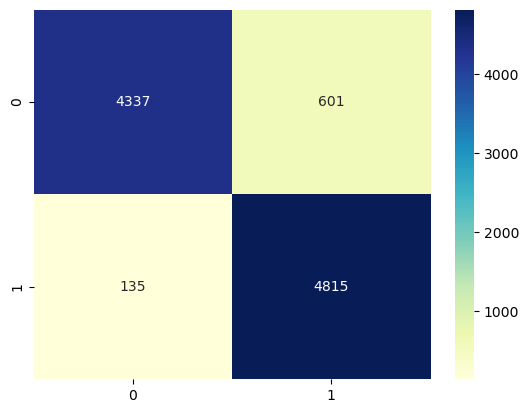

In [87]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

# Conclusion

In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

A hyperparameter tuned random forest classifier gives the same accuracy score of 93% and f1 score of 93%.

# Future scope

We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.